#アンサンブル法

In [ ]:
# アンサンブル法(ensemble method)とは，複数のアルゴリズムを合わせることによって， より高精度の予測もしくは分類を得るためのメタアルゴリズムである． 
# その基本原理は「ばらつきをもったデータを集約するとばらつきが減少する」という 統計の公理であり，様々なデータや手法で得られた結果を， 平均したり多数決したりすることによって，よりばらつきの少ない結果を得ようというものである．

# バギング(bagging; bootstrap aggregatingの略）は，ブートストラップ(bootstrap)とよばれるリサンプリング法によって複数のトレーニング集合を作成し， それらのデータを用いて作成したモデルを平均（回帰の場合）もしくは多数決（分類の場合）によって統合する方法である．
# ブースティング(boosting)は，複数の手法の重み付けを学習によって調整する方法である．
# ランダム森(random forest)は，決定木ベースのバギングである

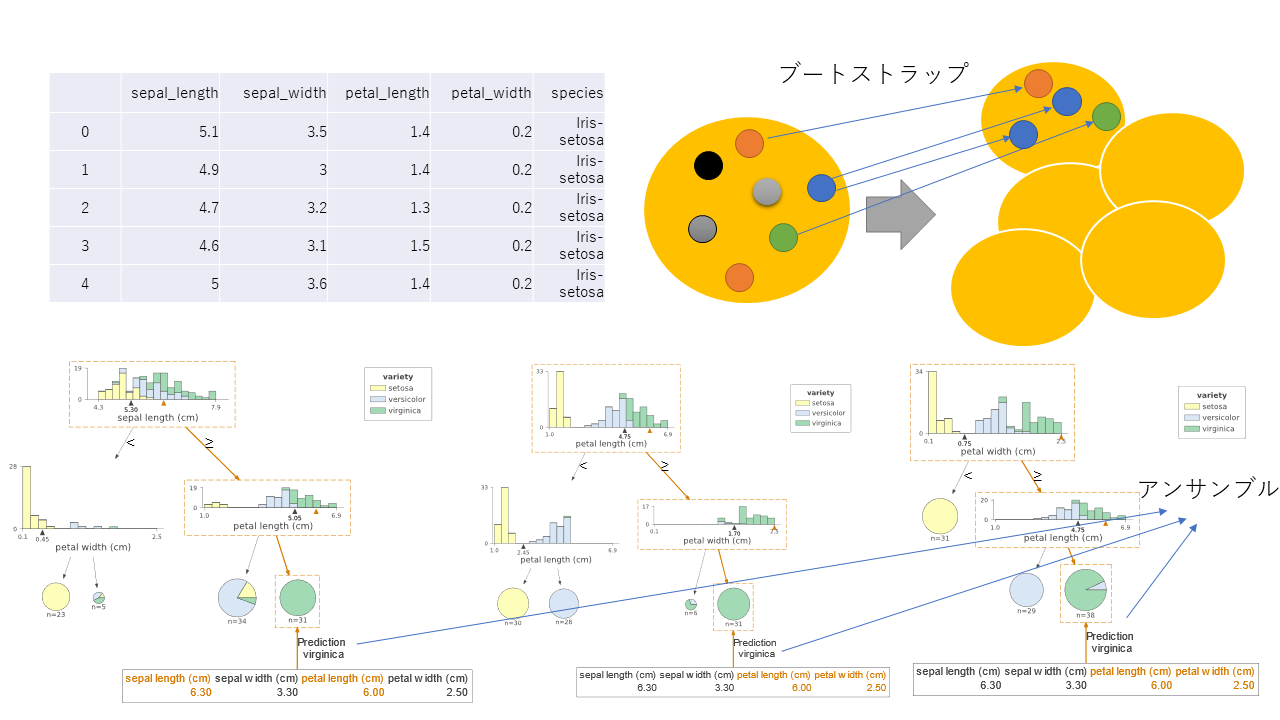

In [2]:
import plotly.express as px
iris = px.data.iris()

#  独立変数（特徴ベクトル） X 
X = iris[ ['sepal_length','sepal_width','petal_length','petal_width'] ]
#従属変数 y 
y = iris['species_id']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
#rondom forest - 　データ(今回は150のデータ)からランダムにデータを選ぶ(ブートストラップ),その後それぞれに対して、決定木を多く作り,民主制(多数決)とって決める

from sklearn import metrics
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier #ランダム森

forest = RandomForestClassifier()
forest.fit(X_train, y_train)    # 訓練
yhat = forest.predict(X_test)   # 予測
print(metrics.accuracy_score(y_test, yhat))

scores = cross_val_score(forest , X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

0.9333333333333333
[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
0.96
